In [445]:
from bs4 import BeautifulSoup
import nltk
import csv
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [446]:
#update data stopwords
stopset = set(stopwords.words('indonesian'))
stopset.update(['aalamin','agama','ahli','al','alaikum','alangkah','alhamdulilaahi','alih','alir','alkohol','allah','ambil',
                'ampun','anak','angkat','aniaya','anshar','anugerah','api','arah','atur','ayat','azab','baca','bagus','baiknya',
                'bakti','balas','banding','bangkit','bangun','bani','bantu','barang','barangsiapa','batas','bau','bawa','baya',
                'belah','beli','belulang','benci','bening','bentang','berita','berkali','bertahta','bertawakkal','bidara',
                'bima','bisik','buka','bumi','bunuh','buruk','buta','cabut','cakap','campur','cari','celaka','cerek','cipta',
                'cucu','curah','dada','dahaga','dalam','damai','debu','dendam','deret','diam','didih','dilak','dinampakkan','dinding',
                'dingin','dipan','doa','dosa','duduk','dunia','duniawi','dur','dusta','edar','empuk','enak','engkau','faedah',
                'firman','galah','ganda','gelap','golong','golong','gugur','habis','hadap','hai','hak','halaman','hampar',
                'hapus','haram','harap','hati','henti','hijau','hijrah','hina','hitam','hizbullah','hormat','hubung','hukum',
                'huni','ikat','ikhlas','illiyyin','injil','ira','isi','israil','istana','izin','jaga','jahanam','jahannam','jahat',
                'janji','jenis','jihad','jin','jiwa','jual','kabar','kafir','kafur','kali','kam','kanan','karunia','kati',
                'kaum','kawin','kaya','kebaji','kecuali','keliling','kenal','kenan','keras','keridhaan','kerja','kesturi',
                'khabar','khawatir','khusyu','kiamat','kuasa','kuat','kumpul','kurangnya','lak','laki','laksana','laku','langit',
                'langsung','larang','layan','lelah','lelaki','lenyap','lesu','letak','liar','lidah','lihat','lindung','lipat',
                'lomba','ltulah','luas','lurus','mabuk','maha','maksiat','manfaat','manusia','marjan','martabat','mas','masuk',
                'mata','matahari','mati','mekah','mena','menang','miskin','mohon','mudah','muhajirin','muka','munafik','mungkir',
                'murah','murni','muslim','nafkah','nama','nampak','nang','nasuhaa','naung','nazar','neraka','niscata','niscaya',
                'nya','nyata','olah','orang','pahala','paham','pakai','palig','panas','pancar','pandang','panggil','pasang',
                'patut','pedih','pegang','pelihara','pening','penuh','perang','perhati','periksa','perintah','perkasa','pesan','piala',
                'pikul','pilih','pimpin','pincang','pindah','pingit','pinjam','potong','puas','puasa','puji','pusaka','putus','quran',
                'rabb','rabbil','rabbmu','ragu','rahmat','raka','rasulullah','rebut','remaja','rendah','ria','ridha','rombong',
                'rugi','rumah','rupa','rusa','sadar','sakit','salaam','salaamun','salah','salamun','salsabil','sambut','sandar',
                'sanggup','saqar','saring','saudara','sebahagian','sebahagiannya','sedia','sedih','sekira','sekurang','sembah',
                'sembunyi','sempurna','sentosa','sentuh','seraya','seret','seri','seru','sesat','setidak','seyap','shabartum',
                'shalat','sia','sibuk','siksa','simpan','sinar','sisi','situ','sombong','sopan','suara','subhanakallahumma',
                'suka','sumpah','sungguh','suri','suruh','susah','susun','syahid','tabur','takhta','takluk','takut','tama','tanah',
                'tanam','tanda','tasnim','taurat','tawan','tebal','tebus','teguh','tela','teladan','telanjang','telekan',
                'temu','terik','terima','tertawa','tiada','tidak','tidaknya','timbul','timpa','tinggal','tingi','tingkat',
                'tinjau','titah','tolak','tolong','tua','tuhan','tulang','tunai','tunduk','tunggu','turun','tutup','ubah',
                'ukur','umpama','umur','untung','usir','usus','usus','utama','utus','uzur','wafat','wajah','wajib','waris',
                'warna','ya','yakut','yatim','zakat','zalim'])

In [447]:
#proses memebaca file csv
posts = pd.read_csv(open('TemaSurga.csv', newline='', encoding='utf-8'), delimiter=';')

In [448]:
#menampilkan dari fle csv
print(color.BOLD+"\t\t\t\t\t-Data Inputan Tematik Al-Qur'an Cordoba Tema Surga-"+color.END)
print (posts.shape)
posts.head(295)

					-Data Inputan Tematik Al-Qur'an Cordoba Tema Surga-
(295, 3)


,Surah,Ayat,Terjemahan
0,4,95,Tidaklah sama antara mukmin yang duduk (yang t...
1,6,127,Bagi mereka (disediakan) darussalam (surga) pa...
2,9,72,"Allah menjanjikan kepada orang-orang mukmin, l..."
3,10,9,Sesungguhnya orang-orang yang beriman dan meng...
4,10,25,"Allah menyeru (manusia) ke Darussalam (surga),..."
5,13,18,Bagi orang-orang yang memenuhi seruan Tuhannya...
6,13,23,(yaitu) surga ´Adn yang mereka masuk ke dalamn...
7,13,29,"Orang-orang yang beriman dan beramal saleh, ba..."
8,16,30,Dan dikatakan kepada orang-orang yang bertakwa...
9,16,31,(yaitu) surga ´Adn yang mereka masuk ke dalamn...


In [449]:
#menamplkan nama index kolom csv
surahayatDict = {}
count = 0;
for row in zip(posts['Surah'], posts['Ayat']):       
    surahayatDict[count] = row
    count+=1

In [450]:
#menamplkan isi nama index kolom tertentu csv
example_review = posts.iloc[0]
#print(example_review['Terjemahan'])

In [451]:
#proses tokenizng
def identify_tokens(row):
    review = row['Terjemahan']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens]
    return token_words

posts['Tokenizing'] = posts.apply(identify_tokens, axis=1)

In [452]:
#proses stemming & case folding
def stem_list(row):
    my_list = row['Tokenizing']
    stemmed_list = [stemmer.stem(word) for word in my_list]
    return (stemmed_list)

posts['Stemming_CaseFolding'] = posts.apply(stem_list, axis=1)

In [453]:
#proses stopwords
def remove_stops(row):
    my_list = row['Stemming_CaseFolding']
    meaningful_words = [w for w in my_list if not w in stopset]
    return (meaningful_words)

posts['Stopwords'] = posts.apply(remove_stops, axis=1)

In [454]:
#proses Alpha
def is_alpha(row):
    my_alpha = row['Stopwords']
    is_alpha = [word for word in my_alpha if word.isalpha()]
    return (is_alpha)

posts['StopwordCleanFull'] = posts.apply(is_alpha, axis=1)

In [455]:
def rejoin_words(row):
    my_list = row['StopwordCleanFull']
    joined_words = ( " ".join(my_list))
    return joined_words

posts['BagOfWord'] = posts.apply(rejoin_words, axis=1)

In [456]:
print(color.BOLD+"\t\t\t\t\t-langkah-langkah dan Hasil Preprocessing-"+color.END)
print (posts.shape)
posts

					-langkah-langkah dan Hasil Preprocessing-
(295, 8)


,Surah,Ayat,Terjemahan,Tokenizing,Stemming_CaseFolding,Stopwords,StopwordCleanFull,BagOfWord
0,4,95,Tidaklah sama antara mukmin yang duduk (yang t...,"[Tidaklah, sama, antara, mukmin, yang, duduk, ...","[tidak, sama, antara, mukmin, yang, duduk, , y...","[mukmin, , , jalan, harta, , harta, derajat, ,...","[mukmin, jalan, harta, harta, derajat, surga]",mukmin jalan harta harta derajat surga
1,6,127,Bagi mereka (disediakan) darussalam (surga) pa...,"[Bagi, mereka, (, disediakan, ), darussalam, (...","[bagi, mereka, , sedia, , darussalam, , surga,...","[, , darussalam, , surga, , amal, saleh, ]","[darussalam, surga, amal, saleh]",darussalam surga amal saleh
2,9,72,"Allah menjanjikan kepada orang-orang mukmin, l...","[Allah, menjanjikan, kepada, orang-orang, mukm...","[allah, janji, kepada, orang, mukmin, , lelaki...","[mukmin, , perempuan, , , , surga, sungai, , k...","[mukmin, perempuan, surga, sungai, kekal, surg...",mukmin perempuan surga sungai kekal surga adn
3,10,9,Sesungguhnya orang-orang yang beriman dan meng...,"[Sesungguhnya, orang-orang, yang, beriman, dan...","[sungguh, orang, yang, iman, dan, kerja, amal,...","[iman, amal, saleh, , iman, , sungai, surga, n...","[iman, amal, saleh, iman, sungai, surga, nikmat]",iman amal saleh iman sungai surga nikmat
4,10,25,"Allah menyeru (manusia) ke Darussalam (surga),...","[Allah, menyeru, (, manusia, ), ke, Darussalam...","[allah, seru, , manusia, , ke, darussalam, , s...","[, , darussalam, , surga, , , jalan, , islam, , ]","[darussalam, surga, jalan, islam]",darussalam surga jalan islam
5,13,18,Bagi orang-orang yang memenuhi seruan Tuhannya...,"[Bagi, orang-orang, yang, memenuhi, seruan, Tu...","[bagi, orang, yang, penuh, seru, tuhan, , , se...","[, , , , , , , , , , , hisab, ]",[hisab],hisab
6,13,23,(yaitu) surga ´Adn yang mereka masuk ke dalamn...,"[(, yaitu, ), surga, ´Adn, yang, mereka, masuk...","[, yaitu, , surga, adn, yang, mereka, masuk, k...","[, , surga, adn, saleh, , isteri-isterinya, , ...","[surga, adn, saleh, malaikat, pintu]",surga adn saleh malaikat pintu
7,13,29,"Orang-orang yang beriman dan beramal saleh, ba...","[Orang-orang, yang, beriman, dan, beramal, sal...","[orang, yang, iman, dan, amal, saleh, , bagi, ...","[iman, amal, saleh, , bahagia, ]","[iman, amal, saleh, bahagia]",iman amal saleh bahagia
8,16,30,Dan dikatakan kepada orang-orang yang bertakwa...,"[Dan, dikatakan, kepada, orang-orang, yang, be...","[dan, kata, kepada, orang, yang, takwa, , , ap...","[takwa, , , , , , , , , , , , , , kampung, akh...","[takwa, kampung, akhirat, takwa]",takwa kampung akhirat takwa
9,16,31,(yaitu) surga ´Adn yang mereka masuk ke dalamn...,"[(, yaitu, ), surga, ´Adn, yang, mereka, masuk...","[, yaitu, , surga, adn, yang, mereka, masuk, k...","[, , surga, adn, , sungai, , surga, , takwa, ]","[surga, adn, sungai, surga, takwa]",surga adn sungai surga takwa


In [457]:
for new in posts['BagOfWord']:
    bow = new.split(' ')

In [458]:
print(color.BOLD+"\t\t\t\t\t-Kumpulan Kata 'Bag Of Word'-\n"+color.END)
gabung = ' '.join(posts['BagOfWord'])
bow = gabung.split(' ')
filterBow = list(filter(None,bow))
wordSet = set(filterBow) 
print(list(wordSet))

					-Kumpulan Kata 'Bag Of Word'-

['takwa', 'bejana', 'petang', 'minum', 'halus', 'kasur', 'binatang', 'telur', 'indah', 'dar', 'putih', 'emas', 'hidup', 'tenteram', 'amal', 'sejahtera', 'hias', 'sungai', 'permadani', 'nabi', 'dengar', 'jernih', 'nikmat', 'limpah', 'derajat', 'cahaya', 'taat', 'pagi', 'islam', 'suami', 'jalan', 'gelas', 'teman', 'air', 'nyaman', 'gadis', 'kelak', 'perawan', 'sabar', 'bidadari', 'rezeki', 'ikan', 'petik', 'perak', 'salam', 'jahe', 'aman', 'unta', 'bersih', 'hisab', 'senang', 'daging', 'selamat', 'madu', 'perempuan', 'mutiara', 'negeri', 'gelang', 'akhirat', 'delima', 'kaca', 'permata', 'anggur', 'kekal', 'rasul', 'sedekah', 'mukmin', 'pisang', 'shaleh', 'burung', 'pohon', 'cantik', 'bahagia', 'makan', 'iman', 'kurma', 'keluarga', 'mulia', 'gembira', 'lezat', 'malaikat', 'bijaksana', 'lapar', 'istirahat', 'muda', 'raja', 'wanita', 'taman', 'kebun', 'sedap', 'jannah', 'taubat', 'harta', 'piring', 'darussalam', 'shiddiiqiin', 'sayang', 'susu', 'pintu', '

In [459]:
#print(color.BOLD+"\t\t\t\t\t-Kumpulan Kata 'Bag Of Word'-\n"+color.END)
#wordd = []
wordDict = dict.fromkeys(wordSet, 0)
#wordd.append(wordSet)
#pd.DataFrame(wordDict, index=posts ['BagOfWord'])

In [460]:
#Proses Perhitungan Count
import math
arrayCount = []

for new in posts['BagOfWord']:
    bow = new.split(' ')
    filterBow = list(filter(None,bow))
    wordDict = dict.fromkeys(filterBow, 0)
    for word in filterBow:
        wordDict[word]+=1
    arrayCount.append(wordDict)

In [461]:
# HASIL PERHITUNGAN COUNT

In [462]:
print(color.BOLD+"\t\t\t\t\t-Tabel Kemunculan Kata di Setiap Ayat-\n"+color.END)
count = pd.DataFrame(arrayCount)
count.fillna(0)

					-Tabel Kemunculan Kata di Setiap Ayat-



,adn,air,akhirat,amal,aman,anggur,bahagia,bantal,bejana,bersih,...,takwa,taman,taubat,teduh,telur,teman,tenteram,terang,unta,wanita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
#Perhitungan TF(Log Normalization)
import math
arrayTF = []

for new in posts['BagOfWord']:
    bow = new.split(' ')
    filterBow = list(filter(None,bow))
    wordDict = dict.fromkeys(filterBow, 0)
    termfreq={}
    for word in filterBow:
        wordDict[word]+=1
        termfreq[word] = math.log10(1+wordDict[word])
    arrayTF.append(termfreq)

In [464]:
#HASIL PERHITUNGAN TF (Log Normalization)

In [465]:
print(color.BOLD+"\t\t\t\t\t-Tabel Hasil Log Normalization-\n"+color.END)
df = pd.DataFrame(arrayTF)
df
df.fillna(0)

					-Tabel Hasil Log Normalization-



,adn,air,akhirat,amal,aman,anggur,bahagia,bantal,bejana,bersih,...,takwa,taman,taubat,teduh,telur,teman,tenteram,terang,unta,wanita
0,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.00000,0.0,0.00000,0.30103,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.30103,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.00000,0.0,0.00000,0.30103,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
6,0.30103,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
7,0.00000,0.0,0.00000,0.30103,0.00000,0.0,0.30103,0.0,0.0,0.00000,...,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
8,0.00000,0.0,0.30103,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.477121,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
9,0.30103,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.301030,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [466]:
#PROSES PERHITUNGAN IDF

In [467]:
#Perhitungan IDF
import math
arrayIDF = []

panjang=len(posts["BagOfWord"])

termglobalfreq = {}
for term in wordSet:
    count = 0
    for new in posts["Stopwords"]:
        if term in new:
            count+=1
    if count > 0:        
        termglobalfreq[term] = math.log10(panjang/count)
arrayIDF.append(termglobalfreq)
    
#print(termglobalfreq)
#idfDict= math.log10(len(set(new))/panjang)

In [468]:
#HASIL PERHITUNGAN IDF

In [469]:
print(color.BOLD+"\t\t\t\t\t-Tabel Hasil Invers Document Frequency'IDF'-\n"+color.END)
pd.DataFrame(arrayIDF)

					-Tabel Hasil Invers Document Frequency'IDF'-



,adn,air,akhirat,amal,aman,anggur,bahagia,bantal,bejana,bersih,...,takwa,taman,taubat,teduh,telur,teman,tenteram,terang,unta,wanita
0,1.428429,1.293731,1.624724,0.90162,1.770852,2.469822,1.867762,2.168792,2.469822,1.867762,...,1.127399,1.624724,1.992701,1.992701,2.469822,1.992701,2.469822,2.168792,2.469822,2.469822


In [470]:
#Perhitungan TF(Log Normalization)-IDF
import math
arrayTFIDF = []

for new in posts['BagOfWord']:
    bow = new.split(' ')
    filterBow = list(filter(None,bow))
    
    termfreq={}
    wordDict = dict.fromkeys(filterBow, 0)
      
    for word in filterBow:
        wordDict[word]+=1
        termfreq[word] = math.log10(1+wordDict[word]) * termglobalfreq[word]
    arrayTFIDF.append(termfreq)

In [471]:
#HASIL PERHITUNGAN TF(Log Normalization)-IDF

In [472]:
print(color.BOLD+"\t\t\t\t-Tabel Hasil Log Normalization-Invers Document Frequency'IDF'-\n"+color.END)
tfidf = pd.DataFrame(arrayTFIDF)
tfidf.fillna(0)

				-Tabel Hasil Log Normalization-Invers Document Frequency'IDF'-



,adn,air,akhirat,amal,aman,anggur,bahagia,bantal,bejana,bersih,...,takwa,taman,taubat,teduh,telur,teman,tenteram,terang,unta,wanita
0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.00,0.0,0.000000,0.271415,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.43,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.00,0.0,0.000000,0.271415,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.43,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.00,0.0,0.000000,0.271415,0.00000,0.0,0.562252,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.00,0.0,0.489091,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.537906,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.43,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,...,0.339381,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [473]:
#VISUALISASI TF(Log Normalization)-IDF

				-Visualisasi Hasil Log Normalization-Invers Document Frequency'IDF'-



Text(0.5, 0.98, '')

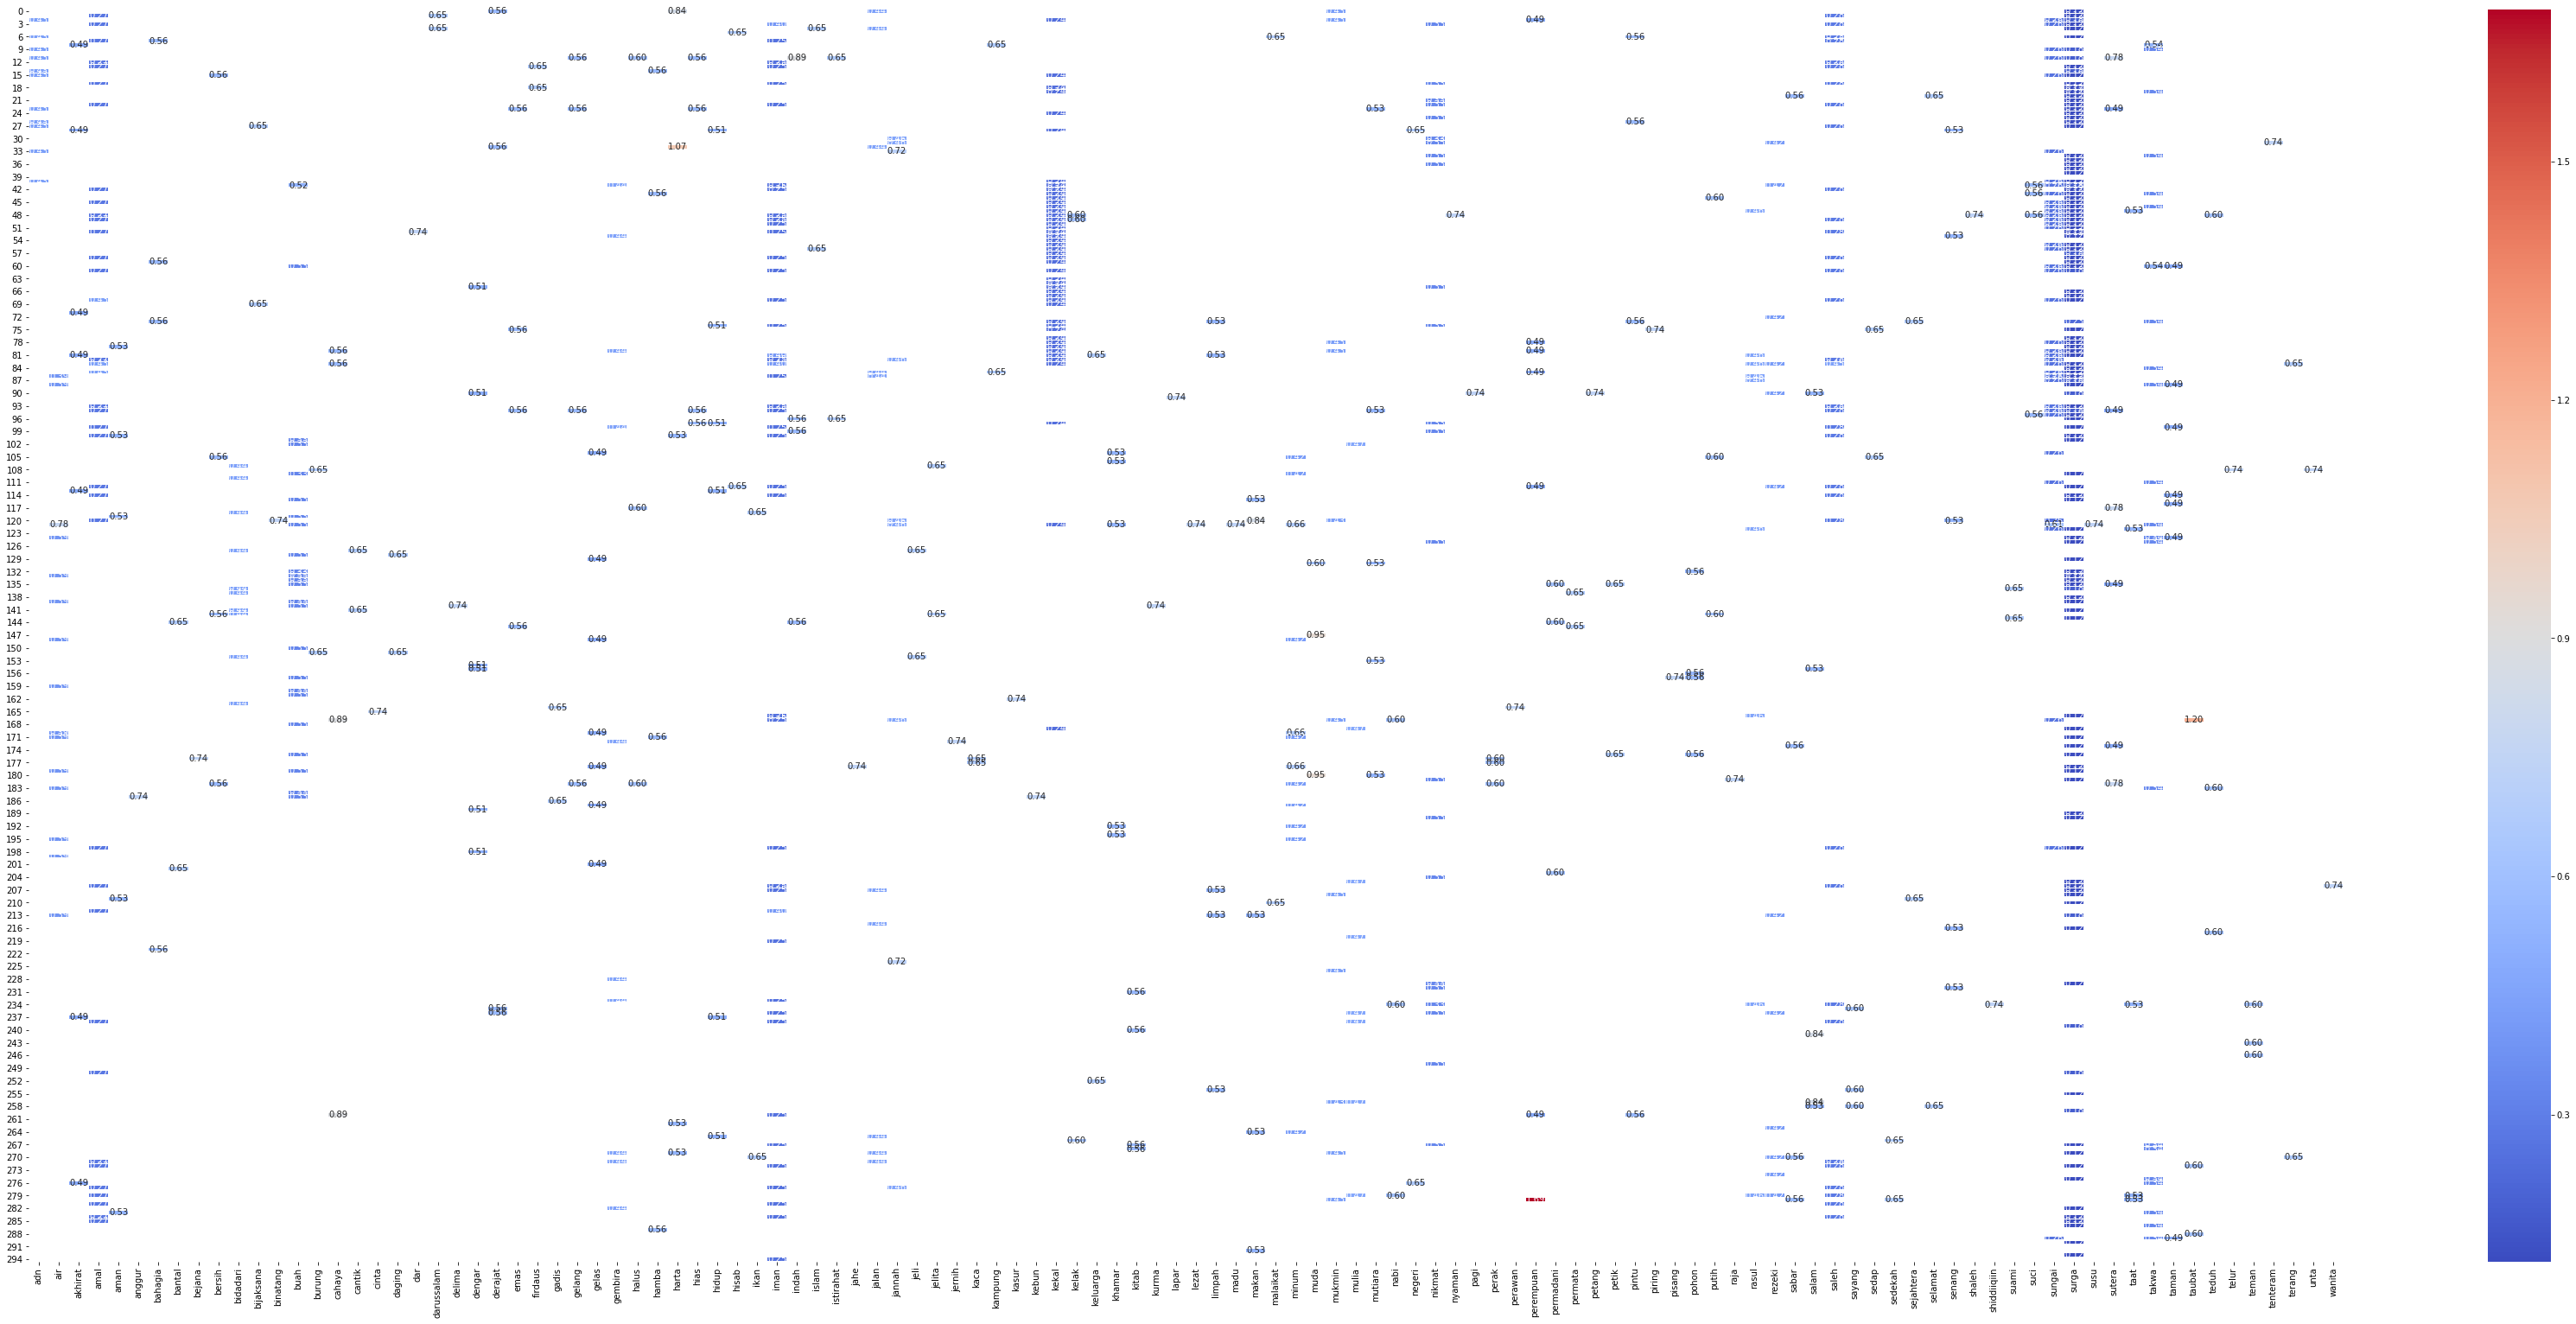

In [474]:
print(color.BOLD+"\t\t\t\t-Visualisasi Hasil Log Normalization-Invers Document Frequency'IDF'-\n"+color.END)
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax) = plt.subplots(1, 1, figsize=(60,25))

hm = sns.heatmap(tfidf, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('', 
              fontsize=14, 
              fontweight='bold') 

In [475]:
print(color.BOLD+"\t\t\t\t-Inputan Singular Value Decomposition 'SVD'-\n"+color.END)
from scipy import sparse
sparse_matrix = sparse.csr_matrix(tfidf.fillna(0).values)
print(sparse_matrix)
sparse_matrix.shape

				-Inputan Singular Value Decomposition 'SVD'-

  (0, 23)	0.5622523941817986
  (0, 32)	0.8449111337175381
  (0, 42)	0.4424605150967305
  (0, 65)	0.43000007526302947
  (0, 102)	0.11543361997918772
  (1, 3)	0.27141475256457637
  (1, 20)	0.6528714524712551
  (1, 90)	0.282469419004003
  (1, 102)	0.11543361997918772
  (2, 0)	0.43000007526302947
  (2, 51)	0.2401388998365704
  (2, 65)	0.43000007526302947
  (2, 75)	0.489090651439581
  (2, 101)	0.2612223985178174
  (2, 102)	0.18295795898950898
  (3, 3)	0.27141475256457637
  (3, 37)	0.3990420601266258
  (3, 70)	0.3335695861888132
  (3, 90)	0.282469419004003
  (3, 101)	0.2612223985178174
  (3, 102)	0.11543361997918772
  (4, 20)	0.6528714524712551
  (4, 39)	0.6528714524712551
  (4, 42)	0.4424605150967305
  (4, 102)	0.11543361997918772
  :	:
  (280, 105)	0.5330795733861871
  (281, 3)	0.27141475256457637
  (281, 37)	0.2517675086603387
  (281, 90)	0.282469419004003
  (282, 29)	0.4424605150967305
  (282, 102)	0.11543361997918772
  (283, 4)	0.5330795

(295, 116)

In [476]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=17, n_iter=100)
lsa.fit(sparse_matrix)

TruncatedSVD(algorithm='randomized', n_components=17, n_iter=100,
             random_state=None, tol=0.0)

In [477]:
#print(lsa.singular_values_)
#print(lsa.explained_variance_)
#print(lsa.explained_variance_ratio_)

In [478]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(sparse_matrix, 
                              n_components=17,
                              n_iter=100,
                              random_state=None)

In [479]:
# ayat_c1 = u.sort_values(by = 0, ascending=False)[0]
# ayat_c1_index = u.sort_values(by = 0, ascending=False).index.tolist()
# c1 = list(zip(ayat_c1_index, ayat_c1))
# print("CONCEPT 1")
# for i in c1:
#     if i[1] > 0:
#         print(i)
# # u = pd.DataFrame(U)
# # print(u)

In [480]:
sigma = pd.DataFrame(Sigma)
#print(sigma)

In [481]:
# vt = pd.DataFrame(VT)
# print(vt)

In [482]:
import sys
#print (sys.version)

In [483]:
#SVD - U
u = pd.DataFrame(U)
konsep1 = 0
ayat = []
p={}
result = {}
ambangbatas= 0
print(color.BOLD,"\t\t\t\t\t- Data Hasil Pengelompokan Ayat Perkonsep 'U' - \n",color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        #print(c0)
        print(color.BOLD+color.UNDERLINE+"Konsep %d:" % i + color.END)
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                #p=(i[0], posts['Surah'][i[0]],posts['Ayat'][i[0]])
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
#                 print(p)
            for s in p: 
#                 print(s)
                counter.update(s)
            result = dict(counter)
#             print(result)
#                 result = dict(counter)
        print(color.BLUE+"Surah & Ayat"+color.END)
        print (result.keys(),color.BOLD,'Jumlah :',color.END,color.RED,len(result.keys()),'Surah & Ayat',color.END)
        print(" ")
        konsep1+=1

 					- Data Hasil Pengelompokan Ayat Perkonsep 'U' - 
 
Konsep 0:
Surah & Ayat
dict_keys([(65, 11), (47, 15), (22, 23), (66, 8), (29, 58), (4, 57), (4, 122), (64, 9), (10, 9), (14, 23), (47, 12), (40, 40), (2, 25), (58, 22), (57, 12), (22, 14), (85, 11), (33, 31), (18, 31), (3, 195), (7, 42), (30, 15), (33, 35), (2, 82), (11, 23), (19, 60), (9, 72), (34, 37), (22, 56), (31, 8), (42, 22), (32, 19), (5, 12), (18, 107), (4, 124), (45, 30), (20, 75), (57, 13), (13, 29), (48, 5), (4, 69), (18, 88), (35, 7), (3, 136), (4, 13), (5, 85), (3, 15), (17, 9), (52, 21), (35, 33), (39, 73), (6, 127), (20, 76), (13, 35), (61, 12), (98, 8), (48, 17), (3, 198), (16, 31), (8, 4), (5, 65), (42, 36), (13, 23), (7, 43), (9, 100), (7, 50), (76, 21), (57, 21), (4, 175), (9, 89), (5, 119), (40, 8), (9, 111), (4, 95), (25, 10), (54, 54), (9, 21), (56, 89), (39, 74), (28, 60), (51, 15), (15, 45), (43, 71), (84, 9), (46, 16), (25, 15), (39, 20), (37, 45), (19, 62), (40, 39), (70, 35), (76, 6), (55, 54), (11, 10

In [484]:
# #SVD-VT
# terms = tfidf.fillna(0)
# print(color.BOLD,"\t\t\t\t\t- Data Hasil Pengelompokan Kata Perkonsep 'VT' - \n",color.END)
# for i, comp in enumerate(lsa.components_): 
#     termsInComp = zip (terms,comp)
#     sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     print(color.BOLD+color.UNDERLINE+"Konsep %d:" % i + color.END)
#     for term in sortedTerms:
#             print("{} ".format(color.BLUE+term[0]+color.END))
#     print (" ")

In [485]:
ArrayCount=[]
for term in wordSet:
    count=0
    for data in posts['BagOfWord']:
        if term in data:
            count+=1
            Bow=term,count
    ArrayCount.append(Bow)

In [486]:
Bow=list(ArrayCount)
Bow.sort()
#Bow
#pd.DataFrame(Bow, columns=['Bow','Jumlah kemunculan'])

In [487]:
# #menyimpan file ke csv
# with open('JumlahTerjemahanKata.csv', 'w',encoding='utf-8',newline='') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(Bow)
#     print ("proses selesai")
# csvFile.close()

In [488]:
hasil = posts[['Surah','Ayat','BagOfWord']]
#hasil.head(10)

In [489]:
ArrayLSA = []
for index, row in posts.iterrows():
    #print('Surah: {}, Ayat: {}, Text: {}'.format(row['Surah'], row['Ayat'], row['processed']))
    for term in wordSet:
        if term in row['BagOfWord']:
            kata=term,row['Surah'],row['Ayat'],row['BagOfWord']
            ArrayLSA.append(kata)

In [490]:
Bow=list(ArrayLSA)
Bow.sort()
data = pd.DataFrame(Bow,columns=['bow','surah','ayat','text',])
#data.head(10)

In [491]:
tfidfDict = {}
gabunganArray=[]
for index, row in tfidf.iterrows():
    for b, s in row.items():
        #print("index: {}, bow: {}, bobot: {}".format(surahayatDict[index], b, j))
        tfidfDict=b,surahayatDict[index],s
        if tfidfDict[2] > 0:
            gabunganArray.append(tfidfDict)
            #print(tfidfDict[2])
#print(tfidfDict[(2, 3), 'iman'])
            #print('{:.3f}'.format(tfidfDict[2]))

In [492]:
data = pd.DataFrame(gabunganArray,columns=['Bag Of Word','Surat & Ayat','TF-IDF'])
#data.head()

In [493]:
#Bag Of Word dengan Surah & Ayat
terms = tfidf
d={}
arayData={}
# print(color.BOLD,"\t\t\t\t- Data Hasil Pencarian Surah & Ayat Berdasarkan Kata 'VT' - \n",color.END)
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     print(color.BOLD+color.UNDERLINE+"Konsep %d:" % i + color.END)
    jumlah=0
    for  term in sortedTerms:
        a=term[0]
        d[a] = [data['Surat & Ayat'][j] 
                for j in data[data['Bag Of Word']==a].index]
#         print("{}: {}: {}".format(color.BLUE+a+color.END,d[a],len(d[a])))
#     print(" ")------------------------

In [494]:
#Surah & Ayat
terms = tfidf
d={}
result = {}
jumlahArray=[]
# print(color.BOLD,"\t\t\t- Data Hasil Pengelompokan Ayat Berdasarkan Kata Perkonsep 'VT' - \n",color.END)
import collections, functools, operator 
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     print(color.BOLD+color.UNDERLINE+"Konsep %d:" % i + color.END)
    counter = collections.Counter()
    for  term in sortedTerms:
        a=term[0]
        d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
        #print("{} {} {}".format(a,d,len(d)))
        for s in d: 
            counter.update(s)
        result = dict(counter)
#     print(color.BLUE+"Surah & Ayat"+color.END)
#     print (result.keys(),color.BOLD,'Jumlah :',color.END,color.RED,len(result.keys()),'Surah & Ayat',color.END)
#     print(" ")-----------------------

In [495]:
# #menampilkan Jumlah TF-IDF yang sesuai terjemahanya LSA
# terms = tfidf
# d={}
# result = {}
# jumlahArray=[]
# import collections, functools, operator 
# for i, comp in enumerate(lsa.components_): 
#     termsInComp = zip (terms,comp)
#     sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     print(color.BOLD+color.UNDERLINE+"Concept %d:" % i + color.END)
#     counter = collections.Counter()
#     for  term in sortedTerms:
#         a=term[0]
#         d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
#         #print("{} {} {}".format(a,d,len(d)))
#         for s in d: 
#             counter.update(s)
#         result = dict(counter)
#     print(result)
#     print(str(len(result)))
#     print(" ")

In [496]:
# #menampilkan Jumlah TF-IDF yang sesuai terjemahanya LSA
# terms = tfidf
# d={}
# result = {}
# jumlahArray=[]
# import collections, functools, operator 
# for i, comp in enumerate(lsa.components_): 
#     termsInComp = zip (terms,comp)
#     sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     print(color.BOLD+color.UNDERLINE+"Concept %d:" % i + color.END)
#     counter = collections.Counter()
#     for  term in sortedTerms:
#         a=term[0]
#         d = [{data['Surat & Ayat'][j]:data['TF-IDF'][j]} for j in data[data['Bag Of Word']==a].index]
#         print('{}, Surah & Ayat : {}, Jumlah : {} Surah & Ayat'.format(color.BLUE+a+color.END,d,len(d)))
#         #print("{} {} {}".format(a,d,len(d)))
#         for s in d: 
#             counter.update(s)
#         result = dict(counter)
#     print(result)
#     print(str(len(result)))
#     print(" ")

In [497]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 0px  black solid !important;
  color: black !important;
}
</style>

In [498]:
#proses memebaca file csv
dataTema = pd.read_csv(open('TemaSurgaPersub.csv', newline='', encoding='utf-8'), delimiter=';')

In [499]:
#menampilkan dari fle csv
print(color.BOLD+"\t\t\t\t\t-Data Evaluasi Tematik Al-Qur'an Cordoba Tema Surga-"+color.END)
print (dataTema.shape)
dataTema.head(20)

					-Data Evaluasi Tematik Al-Qur'an Cordoba Tema Surga-
(498, 4)


,Sub Tema Surga,Surah,Ayat,Terjemahan
0,Nama-nama Surga,4,95,Tidaklah sama antara mukmin yang duduk (yang t...
1,Nama-nama Surga,6,127,Bagi mereka (disediakan) darussalam (surga) pa...
2,Nama-nama Surga,9,72,"Allah menjanjikan kepada orang-orang mukmin, l..."
3,Nama-nama Surga,10,9,Sesungguhnya orang-orang yang beriman dan meng...
4,Nama-nama Surga,10,25,"Allah menyeru (manusia) ke Darussalam (surga),..."
5,Nama-nama Surga,13,18,Bagi orang-orang yang memenuhi seruan Tuhannya...
6,Nama-nama Surga,13,23,(yaitu) surga ´Adn yang mereka masuk ke dalamn...
7,Nama-nama Surga,13,29,"Orang-orang yang beriman dan beramal saleh, ba..."
8,Nama-nama Surga,16,30,Dan dikatakan kepada orang-orang yang bertakwa...
9,Nama-nama Surga,16,31,(yaitu) surga ´Adn yang mereka masuk ke dalamn...


In [500]:
dictSurahAyat={}
gabungan=[]
for kolom in zip(dataTema['Surah'],dataTema['Ayat']):
    dictSurahAyat=kolom
    gabungan.append(dictSurahAyat)

In [501]:
#print(type(gabungan))

In [502]:
data = pd.DataFrame(gabungan)

In [503]:
dictSurahAyat={}
count=0
for row in zip(dataTema['Surah'],dataTema['Ayat']):
    dictSurahAyat[count]=row
    count+=1

In [504]:
dictJoin={}
arrayJoin=[]
for isi,surahayat in dictSurahAyat.items():
    dictJoin = dataTema['Sub Tema Surga'][isi], surahayat, dataTema['Terjemahan'][isi]
    arrayJoin.append(dictJoin)

In [505]:
dataTema1 = pd.DataFrame(arrayJoin, columns=['Sub Tema','Surah & Ayat', 'Terjemahan'])
# dataTema1.head(15)

In [506]:
dictSubTema={}
for s in dataTema1['Sub Tema']:
    dictSubTema[s]=[dataTema1['Surah & Ayat'][x] for x in dataTema1[dataTema1['Sub Tema']==s].index]

In [507]:
print(color.BOLD,'\t\t\t\t\t- Inputan Data Gold Standard - \n',color.END)
for subTema,surahAyat in dictSubTema.items():
    print("#",color.BLUE+subTema+color.END,surahAyat,color.BOLD,'Jumlah :',color.END,color.RED,len(surahAyat),'Surah & Ayat',color.END)

 					- Inputan Data Gold Standard - 
 
# Nama-nama Surga [(4, 95), (6, 127), (9, 72), (10, 9), (10, 25), (13, 18), (13, 23), (13, 29), (16, 30), (16, 31), (16, 62), (18, 31), (18, 88), (18, 107), (19, 61), (20, 76), (21, 101), (22, 56), (23, 11), (25, 15), (25, 75), (26, 85), (31, 8), (35, 33), (35, 35), (37, 43), (38, 50), (40, 8), (40, 39), (41, 50), (56, 12), (56, 89), (57, 10), (61, 12), (68, 34), (69, 22), (70, 38), (88, 10), (92, 6), (92, 9), (98, 8)]  Jumlah :   41 Surah & Ayat 
# Keabadian Surga [(2, 25), (2, 82), (3, 15), (3, 107), (3, 136), (3, 198), (4, 13), (4, 57), (4, 122), (5, 85), (5, 119), (7, 42), (9, 21), (9, 22), (9, 72), (9, 89), (9, 100), (10, 26), (11, 23), (11, 108), (13, 35), (14, 23), (15, 48), (18, 3), (18, 108), (19, 61), (20, 76), (21, 102), (23, 11), (25, 15), (25, 16), (25, 76), (29, 58), (31, 9), (37, 58), (37, 59), (38, 54), (39, 73), (40, 8), (40, 39), (42, 36), (43, 71), (44, 56), (46, 14), (48, 5), (50, 34), (57, 12), (58, 22), (64, 9), (65, 11), (9

In [508]:
a=dataTema1.to_dict('index')
#print(a[0])

In [509]:
#EVALUASI

In [510]:
tfidfDict = {}
gabunganArray=[]
for index, row in tfidf.iterrows():
    for b, s in row.items():
        #print("index: {}, bow: {}, bobot: {}".format(surahayatDict[index], b, j))
        tfidfDict=b,surahayatDict[index],s
        if tfidfDict[2] > 0:
            gabunganArray.append(tfidfDict)
data = pd.DataFrame(gabunganArray,columns=['Bag Of Word','Surat & Ayat','TF-IDF'])

In [511]:
# terms = tfidf
# d={}
# result = {}
# jumlahArray=[]
# threshold = 60
# mirip = []
# #ArrayTematik=[]########
# #DataArrayTidakSama=[]##########
# print(color.BOLD,'\t\t\t\t\t- Hasil Evaluasi Tematik Al-Qur`an Cordoba - \n',color.END)
# import collections, functools, operator 
# for i, comp in enumerate(lsa.components_): 
#     termsInComp = zip (terms,comp)
#     sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     konsep="Konsep %d"% i
#     print(color.BOLD+color.UNDERLINE+konsep+color.END)
#     counter = collections.Counter()
#     for  term in sortedTerms:
#         a=term[0]
#         d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
#         #print("{} {} {}".format(a,d,len(d)))
#         for s in d:
#             counter.update(s)
#         result = dict(counter)

#----------------------------------------------------------------------------------------------------------------------
u = pd.DataFrame(U)
konsep1 = 0
p={}
result = {}
threshold = 48
mirip = []
print(color.BOLD,"\t\t\t\t- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Tema Surga'U' - \n",color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        konsep="Konsep %d"% i
        print(color.BOLD+color.UNDERLINE+konsep+color.END)
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
            for s in p: 
                counter.update(s)
            result = dict(counter)
        konsep1+=1
#-------------------------------------------------------------------------------------------------------------------------
        #k = list(result.keys()) ######################
    #print(result.keys(), len(result.keys())) 
    #ArrayTematik.append(k)##########
        for subTema,surahAyat in dictSubTema.items():
            #print(key,k)
            count=0
            jumlah=0
            jumlah1=0
            precision=0
            racall=0
            f1score=0
            l =0
            arrayn=[]
            for s in surahAyat:
                #print(d)
                #arrayx=[]###########
                for d in result.keys():

                    #arrayx.append(d)########
                    #print(d)
                    if s == d:
                        arrayn.append(s)
                        count+=1
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count                       
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
                        f1score=2*(precision*recall)/(precision+recall)
                    else:
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
#                         f1score=2*(precision*recall)/(precision+recall)
            #print(jumlah1,jumlah)
            #print(jumlah1, recall, count)
            print(color.BLUE+subTema+color.END,"\nSurat & Ayat Tepat (TP) ",count,"\nSurah & Ayat Tidak Tepat (FP)",jumlah,"\nSurah & Ayat Tidak Tepat (FN)",jumlah1,"\nPrecision",(int(precision)),'%',
                  "\nRecall",(int(recall)),'%',"\nF1-Score",(int(f1score)),'%',"\n")

            #########
            #liskunci=list(kunci for kunci in arrayx)
            #liscek = list(cek for cek in arrayn)

            #for setcek in liscek:
            #    liskunci.remove(setcek)
            ########

            if int(f1score) >= threshold:
                #DataArrayTidakSama.append(liskunci)##########
                mirip.append((konsep,subTema,count,jumlah,jumlah1,precision,recall,f1score))
            #jumlahArray.append(mirip)
        #print("====================== NILAI KEMIRIPAN TERTINGGI =================================")
        #for value in mirip:
        #    print(color.BOLD+color.UNDERLINE+value[0]+color.END,color.BLUE+value[1]+color.END,"\nSurat & Ayat Tepat ",value[2],"\nSurah & Ayat Tidak Tepat",value[3],"\nPrecision",value[4],'%',"\n")

 				- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Tema Surga'U' - 
 
Konsep 0
Nama-nama Surga 
Surat & Ayat Tepat (TP)  37 
Surah & Ayat Tidak Tepat (FP) 216 
Surah & Ayat Tidak Tepat (FN) 4 
Precision 14 % 
Recall 90 % 
F1-Score 25 % 

Keabadian Surga 
Surat & Ayat Tepat (TP)  48 
Surah & Ayat Tidak Tepat (FP) 205 
Surah & Ayat Tidak Tepat (FN) 3 
Precision 18 % 
Recall 94 % 
F1-Score 31 % 

Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP)  150 
Surah & Ayat Tidak Tepat (FP) 103 
Surah & Ayat Tidak Tepat (FN) 17 
Precision 59 % 
Recall 89 % 
F1-Score 71 % 

Pintu-pintu Surga 
Surat & Ayat Tepat (TP)  2 
Surah & Ayat Tidak Tepat (FP) 251 
Surah & Ayat Tidak Tepat (FN) 0 
Precision 0 % 
Recall 100 % 
F1-Score 1 % 

Memasuki Surga 
Surat & Ayat Tepat (TP)  13 
Surah & Ayat Tidak Tepat (FP) 240 
Surah & Ayat Tidak Tepat (FN) 1 
Precision 5 % 
Recall 92 % 
F1-Score 9 % 

Sifat Ahli Surga 
Surat & Ayat Tepat (TP)  43 
Surah & Ayat Tidak Tepat (FP) 210 
Surah & Ayat Tida

Sifat Ahli Surga 
Surat & Ayat Tepat (TP)  33 
Surah & Ayat Tidak Tepat (FP) 141 
Surah & Ayat Tidak Tepat (FN) 25 
Precision 18 % 
Recall 56 % 
F1-Score 28 % 

Sifat Wanita Penghuni Surga 
Surat & Ayat Tepat (TP)  16 
Surah & Ayat Tidak Tepat (FP) 158 
Surah & Ayat Tidak Tepat (FN) 3 
Precision 9 % 
Recall 84 % 
F1-Score 16 % 

Berangan-angan di dalam Surga 
Surat & Ayat Tepat (TP)  1 
Surah & Ayat Tidak Tepat (FP) 173 
Surah & Ayat Tidak Tepat (FN) 0 
Precision 0 % 
Recall 100 % 
F1-Score 1 % 

Derajat Para Nabi-Shiddiqin-Syuhada 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 174 
Surah & Ayat Tidak Tepat (FN) 1 
Precision 0 % 
Recall 0 % 
F1-Score 0 % 

Perbedaan Derajat di Surga 
Surat & Ayat Tepat (TP)  10 
Surah & Ayat Tidak Tepat (FP) 164 
Surah & Ayat Tidak Tepat (FN) 6 
Precision 5 % 
Recall 62 % 
F1-Score 10 % 

Percakapan Para Ahli Surga 
Surat & Ayat Tepat (TP)  9 
Surah & Ayat Tidak Tepat (FP) 165 
Surah & Ayat Tidak Tepat (FN) 11 
Precision 5 % 
Recall 45 % 
F

Perbuatan Baik adalah Penyebab Masuk Surga 
Surat & Ayat Tepat (TP)  32 
Surah & Ayat Tidak Tepat (FP) 114 
Surah & Ayat Tidak Tepat (FN) 46 
Precision 21 % 
Recall 41 % 
F1-Score 28 % 

Pakaian Ahli Surga 
Surat & Ayat Tepat (TP)  3 
Surah & Ayat Tidak Tepat (FP) 143 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 2 % 
Recall 60 % 
F1-Score 3 % 

Konsep 8
Nama-nama Surga 
Surat & Ayat Tepat (TP)  15 
Surah & Ayat Tidak Tepat (FP) 114 
Surah & Ayat Tidak Tepat (FN) 26 
Precision 11 % 
Recall 36 % 
F1-Score 17 % 

Keabadian Surga 
Surat & Ayat Tepat (TP)  22 
Surah & Ayat Tidak Tepat (FP) 107 
Surah & Ayat Tidak Tepat (FN) 29 
Precision 17 % 
Recall 43 % 
F1-Score 24 % 

Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP)  78 
Surah & Ayat Tidak Tepat (FP) 51 
Surah & Ayat Tidak Tepat (FN) 89 
Precision 60 % 
Recall 46 % 
F1-Score 52 % 

Pintu-pintu Surga 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 129 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 0 % 
Recall 0 % 
F1-Score 0

Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP)  81 
Surah & Ayat Tidak Tepat (FP) 41 
Surah & Ayat Tidak Tepat (FN) 86 
Precision 66 % 
Recall 48 % 
F1-Score 56 % 

Pintu-pintu Surga 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 122 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 0 % 
Recall 0 % 
F1-Score 0 % 

Memasuki Surga 
Surat & Ayat Tepat (TP)  2 
Surah & Ayat Tidak Tepat (FP) 120 
Surah & Ayat Tidak Tepat (FN) 12 
Precision 1 % 
Recall 14 % 
F1-Score 2 % 

Sifat Ahli Surga 
Surat & Ayat Tepat (TP)  31 
Surah & Ayat Tidak Tepat (FP) 91 
Surah & Ayat Tidak Tepat (FN) 27 
Precision 25 % 
Recall 53 % 
F1-Score 34 % 

Sifat Wanita Penghuni Surga 
Surat & Ayat Tepat (TP)  4 
Surah & Ayat Tidak Tepat (FP) 118 
Surah & Ayat Tidak Tepat (FN) 15 
Precision 3 % 
Recall 21 % 
F1-Score 5 % 

Berangan-angan di dalam Surga 
Surat & Ayat Tepat (TP)  1 
Surah & Ayat Tidak Tepat (FP) 121 
Surah & Ayat Tidak Tepat (FN) 0 
Precision 0 % 
Recall 100 % 
F1-Score 1 % 

Derajat Para N

Surah & Ayat Tidak Tepat (FN) 27 
Precision 10 % 
Recall 34 % 
F1-Score 15 % 

Keabadian Surga 
Surat & Ayat Tepat (TP)  18 
Surah & Ayat Tidak Tepat (FP) 118 
Surah & Ayat Tidak Tepat (FN) 33 
Precision 13 % 
Recall 35 % 
F1-Score 19 % 

Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP)  90 
Surah & Ayat Tidak Tepat (FP) 46 
Surah & Ayat Tidak Tepat (FN) 77 
Precision 66 % 
Recall 53 % 
F1-Score 59 % 

Pintu-pintu Surga 
Surat & Ayat Tepat (TP)  0 
Surah & Ayat Tidak Tepat (FP) 136 
Surah & Ayat Tidak Tepat (FN) 2 
Precision 0 % 
Recall 0 % 
F1-Score 0 % 

Memasuki Surga 
Surat & Ayat Tepat (TP)  1 
Surah & Ayat Tidak Tepat (FP) 135 
Surah & Ayat Tidak Tepat (FN) 13 
Precision 0 % 
Recall 7 % 
F1-Score 1 % 

Sifat Ahli Surga 
Surat & Ayat Tepat (TP)  26 
Surah & Ayat Tidak Tepat (FP) 110 
Surah & Ayat Tidak Tepat (FN) 32 
Precision 19 % 
Recall 44 % 
F1-Score 26 % 

Sifat Wanita Penghuni Surga 
Surat & Ayat Tepat (TP)  17 
Surah & Ayat Tidak Tepat (FP) 119 
Surah & Ayat Tidak Tep

In [512]:
print(color.BOLD,"\t\t\t\t- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Terbaik 'U'- \n",color.END)
for value in mirip:
    print(color.BOLD+color.UNDERLINE+value[0]+color.END,color.BLUE+value[1]+color.END,"\nSurat & Ayat Tepat (TP)",value[2],"\nSurah & Ayat Tidak Tepat (FP)",value[3],"\nSurah & Ayat Tidak Tepat (FN)",value[4],"\nPrecision",value[5],'%',"\nRacall",value[6],'%',"\nF1-Score",value[7],'%',"\n")

 				- Data Hasil Perhitungan Evaluasi Tematik Al-Qur`an Cordoba Terbaik 'U'- 
 
Konsep 0 Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP) 150 
Surah & Ayat Tidak Tepat (FP) 103 
Surah & Ayat Tidak Tepat (FN) 17 
Precision 59.28853754940712 % 
Racall 89.82035928143712 % 
F1-Score 71.42857142857143 % 

Konsep 1 Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP) 108 
Surah & Ayat Tidak Tepat (FP) 42 
Surah & Ayat Tidak Tepat (FN) 59 
Precision 72.0 % 
Racall 64.67065868263472 % 
F1-Score 68.13880126182964 % 

Konsep 2 Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP) 95 
Surah & Ayat Tidak Tepat (FP) 59 
Surah & Ayat Tidak Tepat (FN) 72 
Precision 61.68831168831169 % 
Racall 56.886227544910184 % 
F1-Score 59.190031152647975 % 

Konsep 4 Sifat Surga dan Kenikmatannya 
Surat & Ayat Tepat (TP) 104 
Surah & Ayat Tidak Tepat (FP) 70 
Surah & Ayat Tidak Tepat (FN) 63 
Precision 59.77011494252874 % 
Racall 62.27544910179641 % 
F1-Score 60.997067448680355 % 

Konsep 7 Sifat Surga 

In [513]:
#Evaluasi
# terms = tfidf
# d={}
# result = {}
# ArrayTematik=[]
# DataArrayTidakSama=[]
# print(color.BOLD,'\t\t\t\t\t- Data Hasil Evaluasi Tematik Al-Qur`an Cordoba Terbaik - \n',color.END)
# import collections, functools, operator 
# for i, comp in enumerate(lsa.components_): 
#     termsInComp = zip (terms,comp)
#     sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
#     konsep="Konsep %d"% i
#     #print(konsep,"\n")
#     counter = collections.Counter()
#     for  term in sortedTerms:
#         a=term[0]
#         d = [{data['Surat & Ayat'][j]} for j in data[data['Bag Of Word']==a].index] 
#         #print("{} {} {}".format(a,d,len(d)))
        
#         for s in d: 
#             counter.update(s)
#         result = dict(counter)
#         k = list(result.keys())
#     #print(sorted(result.keys()), len(result))
#     ArrayTematik.append(k)
#     #print(result.keys(), len(result.keys()))

#----------------------------------------------------------------------------------------------------------------------
u = pd.DataFrame(U)
konsep1 = 0
p={}
result = {}
ArrayTematik=[]
DataArrayTidakSama=[]
# print(color.BOLD,'\t\t\t\t- Data Hasil Pengelompokan Tematik Al-Qur`an LSA - \n',color.END)
import collections, functools, operator 
while konsep1 < len(lsa.components_):
    for i, comp in enumerate(lsa.components_):
        ayat_c0 = u.sort_values(by = konsep1, ascending=False)[konsep1]
        ayat_c0_index = u.sort_values(by = konsep1, ascending=False).index.tolist()
        c0 = list(zip(ayat_c0_index, ayat_c0))
        konsep="Konsep %d"% i
        #print(color.BOLD+color.UNDERLINE+konsep+color.END)
        counter = collections.Counter()
        for i in c0:
            if i[1] > ambangbatas:
                p=[{(posts['Surah'][i[0]],posts['Ayat'][i[0]])}]
            for s in p: 
                counter.update(s)
            result = dict(counter)
            k = list(result.keys())
        ArrayTematik.append(k)
        konsep1+=1
#-------------------------------------------------------------------------------------------------------------------------
        for subTema,surahAyat in dictSubTema.items():
            count=0
            jumlah=0
            jumlah1=0
            precision=0
            racall=0
            f1score=0
            l =0
            arrayn=[]
            for s in surahAyat:
                arrayx=[]
                for d in result.keys():
                    arrayx.append(d)
                    if s==d:
                        #print(d)
                        arrayn.append(s)
                        count+=1
                        jumlah=len(result.keys())-count
                        jumlah1=(len(surahAyat)-count)
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100
                        f1score=2*(precision*recall)/(precision+recall)
                    else:
                        jumlah1=(len(surahAyat)-count)
                        jumlah=len(result.keys())-count
                        precision= count/(count+jumlah)*100
                        recall= count/(count+jumlah1)*100

            #merubah ke list data  
            liskunci=list(kunci for kunci in arrayx)
            liscek = list(cek for cek in arrayn)

            #print(sorted(liskunci), len(liskunci))
            #print(sorted(liscek), len(liscek))

            #remove data yang sama
            for setcek in liscek:
                liskunci.remove(setcek)

            if float(f1score) >= threshold:
#                 print(color.BOLD+color.UNDERLINE+konsep+color.END)
                DataArrayTidakSama.append(liskunci)
#                 print(color.BLUE+color.BOLD+"Tematik Pengelompokan Latent Semantic Analysis"+color.END)
#                 print(sorted(result.keys()),color.BOLD,'Jumlah :',color.END,color.RED,len(result.keys()),'Surah & Ayat\n',color.END)
                #print("DATA TP ")
#                 print(color.BLUE+"Surat & Ayat Tepat"+color.END,sorted(arrayn),color.BOLD,'Jumlah :',color.END,color.RED,len(arrayn),'Surah & Ayat\n',color.END)
                #print("DATA TF ")
#                 print(color.BLUE+"Surah & Ayat Tidak Tepat"+color.END,liskunci,color.BOLD,'Jumlah :',color.END,color.RED,len(liskunci),'Surah & Ayat\n',color.END)
                #print("PRECISION ")
                #print(subTema,"\nSurat & Ayat Tepat :",count,"\nSurah & Ayat Tidak Tepat :",jumlah,"\nPrecision :",total,"\n")

#         print(" ")

In [514]:
#membuat array data precision
Array_Data_TF=[]
Array_data_akhir=[]
Array_data=[]
Array_Data_Komplek=[]
for data_tidak_sama in DataArrayTidakSama:
    for set_data in data_tidak_sama:
        Array_Data_TF.append(set_data)

set_data_akhir=list(dict.fromkeys(Array_Data_TF))
Array_data_akhir.append(set_data_akhir)
for baris in Array_data_akhir:
    for kolom in baris:
        Array_data.append(kolom)
        
#panggil data
DataTerjemahan={}
for a in dataTema1['Surah & Ayat']:
    for x in dataTema1[dataTema1['Surah & Ayat']==a].index:
        DataTerjemahan[a] = dataTema1['Terjemahan'][x] 
    
for baris in Array_data:
    for subTema,surahAyat in DataTerjemahan.items():
        if baris == subTema:
            Array_Data_Komplek.append((baris,surahAyat))

In [515]:
#menampilkan data csv hasil akhir
# print(color.BOLD+"\t\t\t-Data Hasil Tidak Tepat Evaluasi Tematik Al-Qur'an Cordoba Tema Surga 'U'-"+color.END)
# pd.DataFrame(Array_Data_Komplek, columns=['Surah & Ayat', 'Terjemahan'])

In [516]:
# #menyimpan file ke csv
# with open('Data_Evaluasi_Tematik.csv', 'w',encoding='utf-8',newline='') as csvFile:
#     writer = csv.writer(csvFile)
#     writer.writerows(Array_Data_Komplek)
#     print ("proses selesai")
# csvFile.close()